In [3]:
import pandas as pd                                                             # Importing pandas library for data manipulation
import numpy as np                                                              # Importing numpy for numerical operations
import matplotlib.pyplot as plt                                                 # Importing matplotlib for data visualization
import seaborn as sns                                                           # Importing seaborn for enhanced data visualization
import string                                                                   # Importing string module for string operations
import nltk                                                                     # Importing nltk for natural language processing
from nltk.corpus import stopwords                                               # Importing stopwords from nltk
from sklearn.feature_extraction.text import TfidfVectorizer                     # Importing TfidfVectorizer for text vectorization
from sklearn.metrics import accuracy_score, precision_score                     # Importing metrics for model evaluation
from sklearn.metrics import classification_report                               # Importing classification report
from collections import Counter                                                 # Importing Counter for counting elements
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB          # Importing Naive Bayes models
from sklearn.linear_model import LogisticRegression                             # Importing Logistic Regression model
from sklearn.svm import SVC                                                     # Importing Support Vector Classifier model
from sklearn.tree import DecisionTreeClassifier                                 # Importing Decision Tree Classifier model
from sklearn.neighbors import KNeighborsClassifier                              # Importing K-Nearest Neighbors model
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from xgboost import XGBClassifier
from nltk.stem import SnowballStemmer                                           # Importing SnowballStemmer for stemming words
from sklearn.model_selection import cross_val_score,KFold,StratifiedKFold,train_test_split,RandomizedSearchCV, GridSearchCV


In [5]:
# Importing data and dropping rows with missing values
df = pd.read_csv('/content/completeSpamAssassin.csv')
df.dropna(inplace=True)
df.head()

,Unnamed: 0,Body,Label
0,0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1
1,1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
2,2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
3,3,##############################################...,1
4,4,I thought you might like these:\n1) Slim Down ...,1


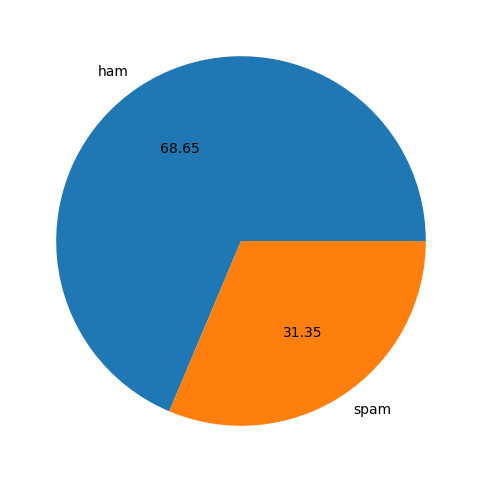

In [6]:
# Data Visualization
# Creating a pie chart to show the distribution of ham and spam labels
plt.figure(figsize=(12,6))
plt.pie(df['Label'].value_counts(), labels=['ham','spam'], autopct='%0.2f')
plt.show()

In [7]:
# Text Preprocessing
def text_preprocessing(text):
    text = text.lower()                    # Convert text to lowercase
    text = nltk.word_tokenize(text)        # Tokenize text into words
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)                    # Removing non-alphanumeric characters
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)                   # Removing stopwords and punctuation
    text = y[:]
    y.clear()
    stemmer = SnowballStemmer('english')  # Initializing SnowballStemmer for stemming words
    for i in text:
        y.append(stemmer.stem(i))         # Applying stemming to words
    return " ".join(y)                    # Joining processed words back into text


In [8]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [9]:
# Applying text preprocessing function to 'Body' column and creating a new 'clean_text' column
df['clean_text'] = df['Body'].apply(text_preprocessing)

In [10]:
df.head()

,Unnamed: 0,Body,Label,clean_text
0,0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1,save 70 life insur spend life quot save ensur ...
1,1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1,1 fight risk cancer http slim guarante lose lb...
2,2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1,1 fight risk cancer http slim guarante lose lb...
3,3,##############################################...,1,adult club offer free membership instant acces...
4,4,I thought you might like these:\n1) Slim Down ...,1,thought might like 1 slim guarante lose lbs 30...


In [11]:
# Analyzing Words
def analyze_words(corpus, label):
    word_corpus = []
    for mail in df[df['Label'] == label]['clean_text'].tolist():
        for word in mail.split():
            word_corpus.append(word)      # Creating a list of words for a given label (spam or ham)
    return word_corpus

In [12]:
# Analyzing words in spam and ham emails
spam_corpus = analyze_words(df, 1)
ham_corpus = analyze_words(df, 0)

In [18]:
pd.DataFrame(Counter(spam_corpus).most_common(50)).head(10)

,0,1
0,â,7556
1,email,2356
2,free,2165
3,http,1742
4,click,1719
5,get,1602
6,busi,1518
7,receiv,1442
8,order,1428
9,list,1408


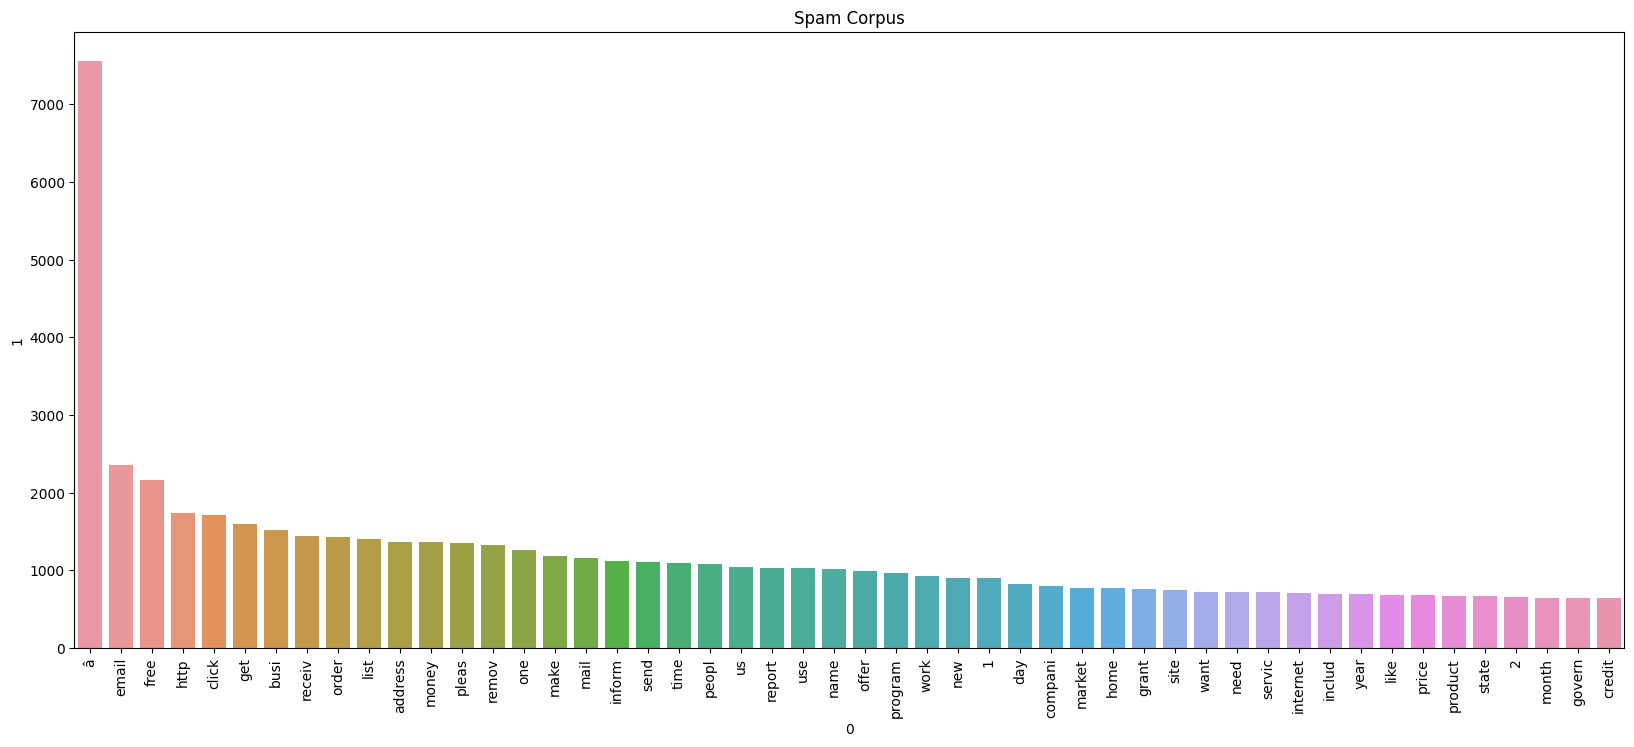

In [14]:
# Creating bar plots to visualize top words in spam and ham emails
plt.figure(figsize=(20,8))
sns.barplot(data=pd.DataFrame(Counter(spam_corpus).most_common(50)),x=0,y=1)
plt.xticks(rotation='vertical')
plt.title('Spam Corpus')
plt.show()

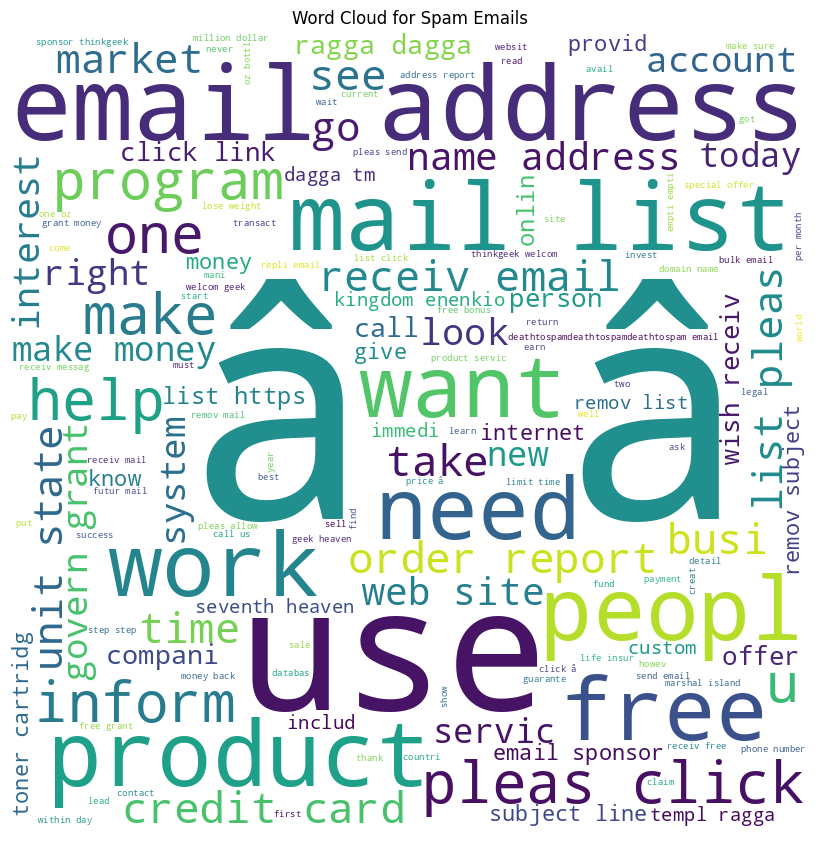

In [15]:
# Visualizing word cloud for spam emails
from wordcloud import WordCloud
spam_wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=150).generate(" ".join(spam_corpus))
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title('Word Cloud for Spam Emails')
plt.show()

In [17]:
pd.DataFrame(Counter(ham_corpus).most_common(50)).head(10)

,0,1
0,http,10208
1,use,4004
2,â,3065
3,list,2951
4,get,2609
5,one,2580
6,2002,2189
7,mail,2180
8,like,2110
9,would,2102


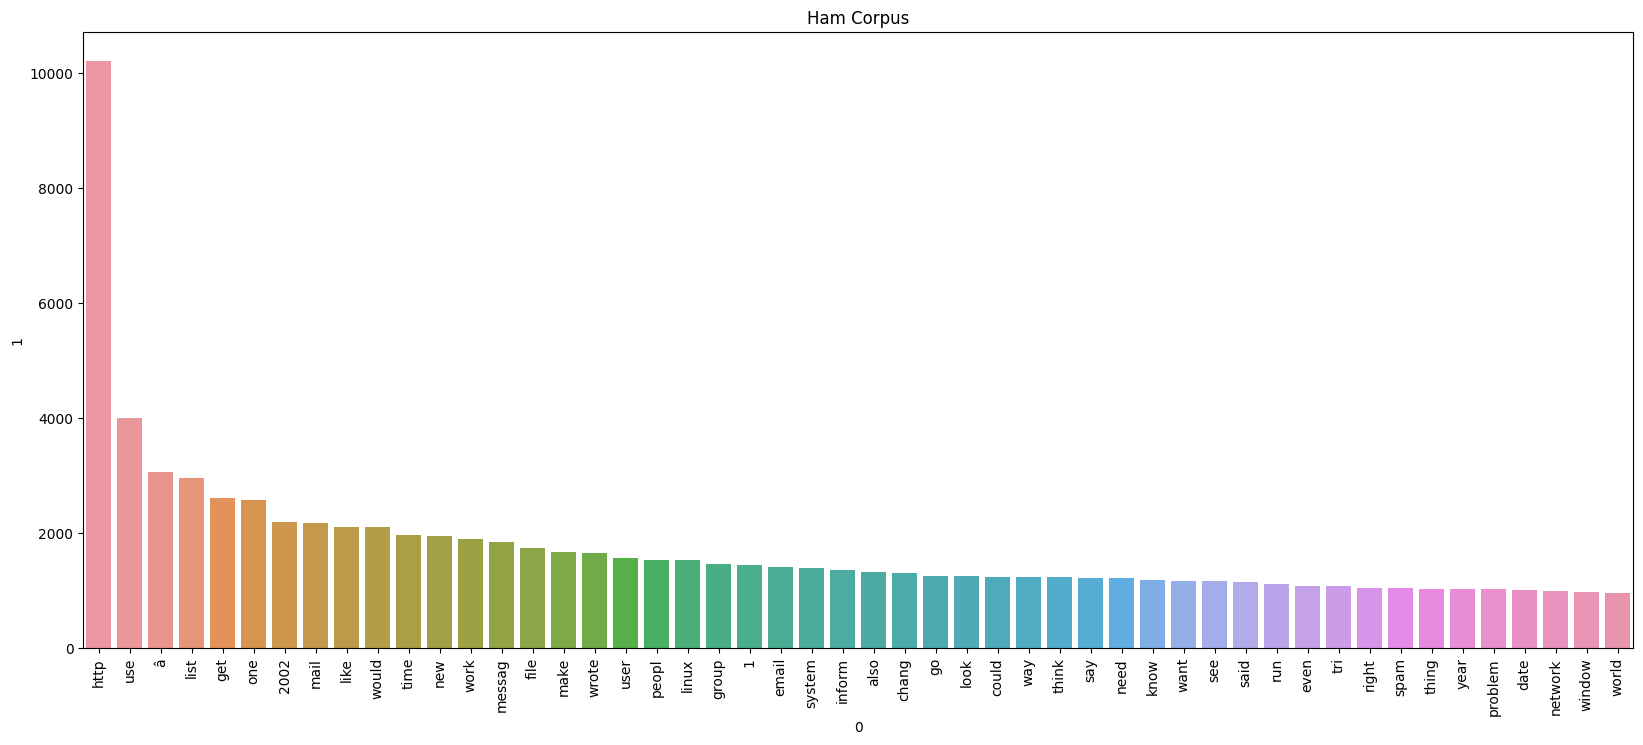

In [19]:
plt.figure(figsize=(20,8))
sns.barplot(data=pd.DataFrame(Counter(ham_corpus).most_common(50)),x=0,y=1)
plt.xticks(rotation='vertical')
plt.title('Ham Corpus')
plt.show()

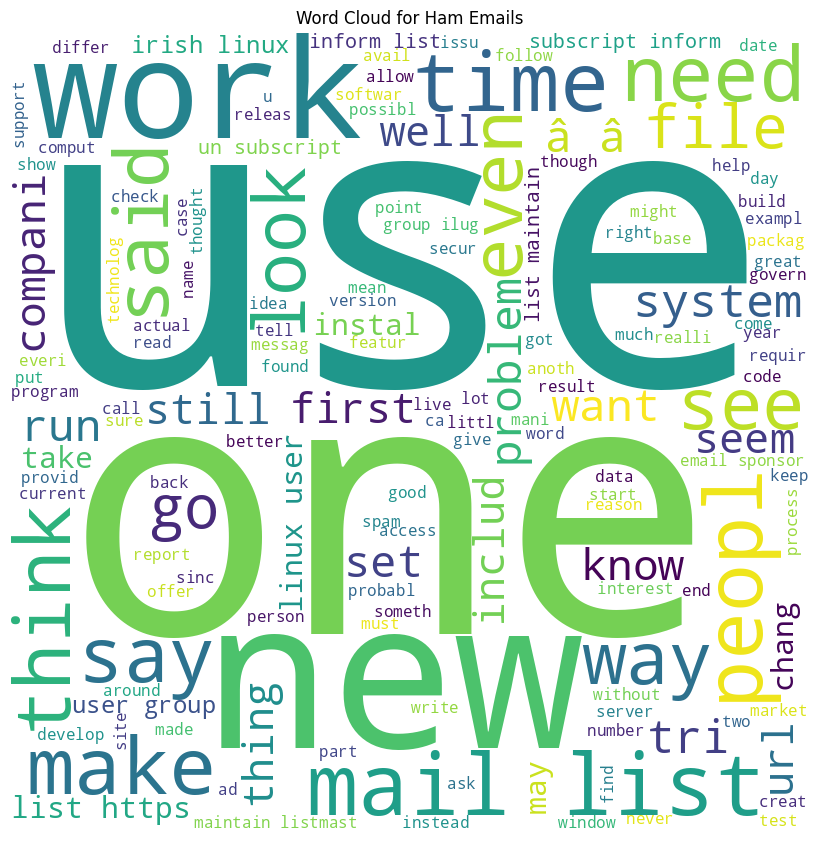

In [20]:
# Visualizing word cloud for ham emails
ham_wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=150).generate(" ".join(ham_corpus))
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(ham_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title('Word Cloud for Ham Emails')
plt.show()

In [21]:
# Analyzing word lengths in spam and ham emails
spam_word_lengths = [len(word) for word in spam_corpus]
ham_word_lengths = [len(word) for word in ham_corpus]

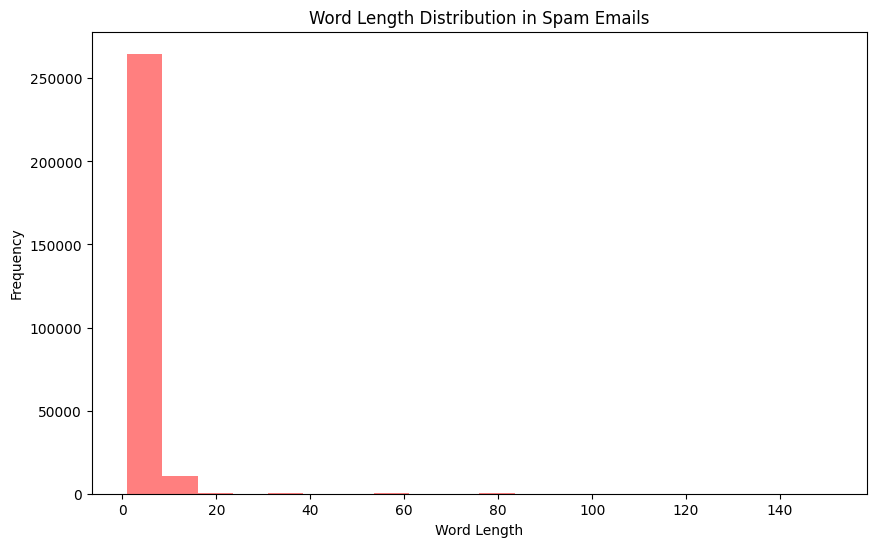

In [22]:
# Plotting histograms for word lengths
plt.figure(figsize=(10, 6))
plt.hist(spam_word_lengths, bins=20, alpha=0.5, color='red', label='Spam')
plt.xlabel('Word Length')
plt.ylabel('Frequency')
plt.title('Word Length Distribution in Spam Emails')
plt.show()

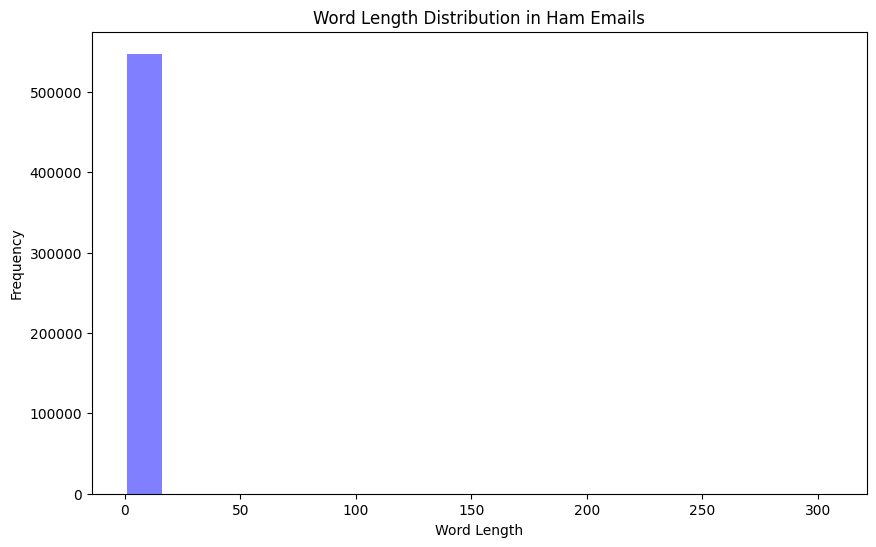

In [23]:
plt.figure(figsize=(10, 6))
plt.hist(ham_word_lengths, bins=20, alpha=0.5, color='blue', label='Ham')
plt.xlabel('Word Length')
plt.ylabel('Frequency')
plt.title('Word Length Distribution in Ham Emails')
plt.show()

In [24]:
# Feature Engineering with TF-IDF
tfidf = TfidfVectorizer(max_features=17000)             # Initializing TF-IDF vectorizer
x = tfidf.fit_transform(df['clean_text']).toarray()     # Transforming text data into numerical features
y = df['Label'].values                                  # Extracting labels

In [25]:
print(x.shape)
print(x)
print('-'*30)
print(y.shape)
print(y)

(6045, 17000)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
------------------------------
(6045,)
[1 1 1 ... 0 0 0]


In [26]:
print(df.shape)

(6045, 4)


In [27]:
# Model Training
classifiers = {
    'GaussianNB' : GaussianNB(),                                                  # Initializing Gaussian Naive Bayes model
    'MultinomialNB' : MultinomialNB(),                                            # Initializing Multinomial Naive Bayes model
    'BernoulliNB' : BernoulliNB(),                                                # Initializing Bernoulli Naive Bayes model
    'SVC' : SVC(kernel='sigmoid', gamma=1.0),                                     # Initializing Support Vector Classifier model
    'KNeighbors' : KNeighborsClassifier(),                                        # Initializing K-Nearest Neighbors model
    'DecisionTree': DecisionTreeClassifier(max_depth=5),                          # Initializing Decision Tree Classifier model
    'LogisticRegression': LogisticRegression(solver='liblinear', penalty='l1'),   # Initializing Logistic Regression model
    'RandomForest': RandomForestClassifier(),
    'XGBoost': XGBClassifier()
}

In [30]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.4, random_state=42)
x_valid, x_test, y_valid, y_test = train_test_split(x_valid, y_valid, test_size=0.5, random_state=42)

In [31]:
print(x_train.shape)
print(y_train.shape)
print(x_valid.shape)
print(y_valid.shape)
print(x_test.shape)
print(y_test.shape)

(3627, 17000)
(3627,)
(1209, 17000)
(1209,)
(1209, 17000)
(1209,)


In [32]:
def training_perf(model, x_train, y_train):
    model = model.fit(x_train,y_train)
    y_pred = model.predict(x_train)

    print('Accuracy Score: ',accuracy_score(y_pred,y_train)*100)
    print('-'*50)
    print(classification_report(y_pred, y_train))

In [33]:
# Training and Evaluating Models
for name, classifier in classifiers.items():
    print(name,':\n')
    training_perf(classifier,x_train,y_train)
    print('*'*50)

GaussianNB :

Accuracy Score:  95.25778880617591
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      2364
           1       1.00      0.86      0.93      1263

    accuracy                           0.95      3627
   macro avg       0.97      0.93      0.95      3627
weighted avg       0.96      0.95      0.95      3627

**************************************************
MultinomialNB :

Accuracy Score:  93.79652605459057
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      2521
           1       0.90      0.89      0.90      1106

    accuracy                           0.94      3627
   macro avg       0.93      0.92      0.93      3627
weighted avg       0.94      0.94      0.94      3627

**************************************************
BernoulliNB :

Accuracy Score:  92.831541

In [37]:
def valid_perf(model, x_train,y_train,x_valid,y_valid):
    model = model.fit(x_train,y_train)
    y_pred = model.predict(x_valid)

    print('Accuracy Score: ',accuracy_score(y_pred,y_valid)*100)
    print('-'*50)
    print(classification_report(y_pred, y_valid))

In [38]:
for name, classifier in classifiers.items():
    print(name,':\n')
    valid_perf(classifier,x_train,y_train,x_valid,y_valid)
    print('*'*50)

GaussianNB :

Accuracy Score:  88.66832092638545
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       789
           1       0.85      0.81      0.83       420

    accuracy                           0.89      1209
   macro avg       0.88      0.87      0.87      1209
weighted avg       0.89      0.89      0.89      1209

**************************************************
MultinomialNB :

Accuracy Score:  90.07444168734492
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       828
           1       0.83      0.87      0.85       381

    accuracy                           0.90      1209
   macro avg       0.88      0.89      0.89      1209
weighted avg       0.90      0.90      0.90      1209

**************************************************
BernoulliNB :

Accuracy Score:  90.074441

The models with the best f1 score: SVC(0.93), XGB(0.93), RandomForest(0.93)

In [40]:
votc = VotingClassifier(estimators = [('SVC',SVC(kernel='sigmoid', gamma=1.0,probability=True)),('RandomForest',RandomForestClassifier()),
                        ('XGB',XGBClassifier())], voting = 'soft')
training_perf(votc,x_train,y_train)

Accuracy Score:  96.63633857182245
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      2420
           1       1.00      0.90      0.95      1207

    accuracy                           0.97      3627
   macro avg       0.98      0.95      0.96      3627
weighted avg       0.97      0.97      0.97      3627



In [41]:
valid_perf(votc,x_train,y_train,x_valid,y_valid)

Accuracy Score:  93.63110008271298
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       777
           1       0.94      0.88      0.91       432

    accuracy                           0.94      1209
   macro avg       0.94      0.92      0.93      1209
weighted avg       0.94      0.94      0.94      1209



In [42]:
votc = votc.fit(x_train,y_train)
y_pred = votc.predict(x_test)
print('Accuracy Score: ',accuracy_score(y_pred,y_test)*100)
print('-'*50)
print(classification_report(y_pred, y_test))

Accuracy Score:  95.28535980148884
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       791
           1       0.95      0.91      0.93       418

    accuracy                           0.95      1209
   macro avg       0.95      0.94      0.95      1209
weighted avg       0.95      0.95      0.95      1209

